In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
#from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
missing_values = ["N/a","na",np.nan]

In [5]:
df_final2 = pd.read_csv("/Users/yaminipriyankakandikattu/Desktop/AH_Monthly_Provisional_Counts_of_Deaths_for_Select_Causes_of_Death_by_Sex__Age__and_Race_and_Hispanic_Origin.csv",na_values = missing_values,thousands=',')

In [6]:
df_final2.head()

,AnalysisDate,Date Of Death Year,Date Of Death Month,Start Date,End Date,Jurisdiction of Occurrence,Sex,Race/Ethnicity,AgeGroup,AllCause,...,Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,10/13/2021,2019,7,07/01/2019,07/31/2019,United States,M,Other,0-4 years,61,...,0,1,0,1,0,6,0,1,0,0
1,10/13/2021,2019,9,09/01/2019,09/30/2019,United States,F,Other,25-34 years,26,...,0,0,0,0,0,0,1,1,0,0
2,10/13/2021,2020,3,03/01/2020,03/31/2020,United States,F,Other,0-4 years,40,...,0,1,0,0,0,7,0,0,0,0
3,10/13/2021,2020,3,03/01/2020,03/31/2020,United States,F,Other,5-14 years,6,...,0,1,0,0,0,0,0,0,0,0
4,10/13/2021,2020,3,03/01/2020,03/31/2020,United States,F,Other,15-24 years,14,...,0,0,0,0,0,1,0,0,0,0


In [7]:
df_final2.isnull().sum()

AnalysisDate                                                                                         0
Date Of Death Year                                                                                   0
Date Of Death Month                                                                                  0
Start Date                                                                                           0
End Date                                                                                             0
Jurisdiction of Occurrence                                                                           0
Sex                                                                                                  0
Race/Ethnicity                                                                                       0
AgeGroup                                                                                             0
AllCause                                                                 

In [8]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 24 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   AnalysisDate                                                                                       3960 non-null   object
 1   Date Of Death Year                                                                                 3960 non-null   int64 
 2   Date Of Death Month                                                                                3960 non-null   int64 
 3   Start Date                                                                                         3960 non-null   object
 4   End Date                                                                                           3960 non-null   object
 5  

df_final2 = pd.melt(df_final2, id_vars = ['AnalysisDate','Date Of Death Year','Date Of Death Month','Start Date',
'End Date','Jurisdiction of Occurrence','Sex','Race/Ethnicity','AgeGroup',],
        var_name = 'Cause of death', value_name = 'No Of deaths')

In [9]:
df_final2_3=df_final2.drop(['AnalysisDate','Date Of Death Year','Date Of Death Month','Start Date','End Date'], axis=1)

df_final2_3 = df_final2.loc[df_final2['Cause of death'] != 'AllCause',] 
df_final2_3 = df_final2.loc[df_final2['Sex'] != 'AllCause', ] 
df_final2_3 = df_final2.loc[df_final2['No Of deaths'] != '0',] 

In [10]:
df_final2_3=df_final2_3.drop(['Jurisdiction of Occurrence','Race/Ethnicity','AgeGroup'], 
               axis=1)

In [11]:
df_final2_3

,Sex,AllCause,NaturalCause,SepticeMia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,M,61,52,0,1,0,0,1,0,1,0,6,0,1,0,0
1,F,26,8,0,1,0,0,0,0,0,0,0,1,1,0,0
2,F,40,35,0,0,0,0,1,0,0,0,7,0,0,0,0
3,F,6,4,1,0,0,0,1,0,0,0,0,0,0,0,0
4,F,14,2,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,M,179,168,1,15,2,1,1,0,0,2,34,18,2,70,68
3956,M,237,225,2,34,7,0,3,8,3,2,36,40,8,55,55
3957,M,263,258,2,51,11,3,4,8,3,4,25,60,7,55,49
3958,M,203,200,1,35,9,5,2,6,4,4,17,37,8,36,34


In [12]:
df_final2_3=df_final2_3.dropna()

In [13]:
df_final2_3.loc[~(df_final2_3==0).all(axis=1)]

,Sex,AllCause,NaturalCause,SepticeMia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,M,61,52,0,1,0,0,1,0,1,0,6,0,1,0,0
1,F,26,8,0,1,0,0,0,0,0,0,0,1,1,0,0
2,F,40,35,0,0,0,0,1,0,0,0,7,0,0,0,0
3,F,6,4,1,0,0,0,1,0,0,0,0,0,0,0,0
4,F,14,2,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,M,179,168,1,15,2,1,1,0,0,2,34,18,2,70,68
3956,M,237,225,2,34,7,0,3,8,3,2,36,40,8,55,55
3957,M,263,258,2,51,11,3,4,8,3,4,25,60,7,55,49
3958,M,203,200,1,35,9,5,2,6,4,4,17,37,8,36,34


In [14]:
df_final2_3.dtypes

Sex                                                                                                  object
AllCause                                                                                              int64
NaturalCause                                                                                          int64
SepticeMia (A40-A41)                                                                                  int64
Malignant neoplasms (C00-C97)                                                                         int64
Diabetes mellitus (E10-E14)                                                                           int64
Alzheimer disease (G30)                                                                               int64
Influenza and pneumonia (J09-J18)                                                                     int64
Chronic lower respiratory diseases (J40-J47)                                                          int64
Other diseases of respirator

In [15]:
train_df, test_df = train_test_split(df_final2_3, test_size=0.3, random_state=321)
train_df["Sex"] = train_df["Sex"]
test_df["Sex"] = test_df["Sex"]

In [16]:
X_train = train_df.drop(columns="Sex")
y_train = train_df["Sex"]
X_test = test_df.drop(columns="Sex")
y_test = test_df["Sex"]

In [17]:
X_train.head()

,AllCause,NaturalCause,SepticeMia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
3907,2344,2275,28,406,128,23,30,31,30,44,85,327,83,750,723
3234,86,27,0,3,0,0,0,1,0,1,4,6,0,0,0
3275,771,579,9,91,31,0,3,7,3,15,41,105,31,85,78
3202,7,7,0,4,0,0,0,0,0,0,0,1,1,1,0
1211,1352,1307,30,411,90,25,24,35,29,48,13,224,85,0,0


In [18]:
y_train

3907    M
3234    M
3275    F
3202    M
1211    F
       ..
1833    F
2847    M
124     M
2586    M
3060    F
Name: Sex, Length: 2772, dtype: object

In [19]:
X_test.head()

,AllCause,NaturalCause,SepticeMia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
1730,9272,8581,166,3059,295,58,282,780,169,121,83,1376,286,87,81
2354,85,31,1,1,0,0,0,0,0,2,2,2,0,8,8
2178,198,190,2,31,27,4,5,10,3,1,0,21,7,53,50
1967,9000,8307,158,2933,306,42,110,597,133,97,50,1432,263,552,502
1267,588,169,2,31,6,0,1,3,5,0,11,26,3,0,0


In [20]:
y_test

1730    F
2354    M
2178    F
1967    F
1267    M
       ..
1564    F
1333    F
1413    M
1000    F
1166    M
Name: Sex, Length: 1188, dtype: object

In [21]:
train_df

,Sex,AllCause,NaturalCause,SepticeMia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
3907,M,2344,2275,28,406,128,23,30,31,30,44,85,327,83,750,723
3234,M,86,27,0,3,0,0,0,1,0,1,4,6,0,0,0
3275,F,771,579,9,91,31,0,3,7,3,15,41,105,31,85,78
3202,M,7,7,0,4,0,0,0,0,0,0,0,1,1,1,0
1211,F,1352,1307,30,411,90,25,24,35,29,48,13,224,85,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,F,169,75,2,4,7,0,0,5,2,1,4,7,1,14,13
2847,M,809,770,8,147,29,2,9,6,5,12,3,147,32,291,274
124,M,178,172,4,45,5,4,3,14,3,1,2,51,9,0,0
2586,M,1473,1159,12,154,63,0,11,6,23,18,21,200,62,271,257


In [22]:
from sklearn.svm import SVC

In [23]:
svm = SVC()

In [24]:
svm.fit(X_train,y_train)

SVC()

In [25]:
svm_pred= svm.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix 

In [27]:
cm = confusion_matrix(y_test, svm_pred)
cm

array([[568,  22],
       [454, 144]])

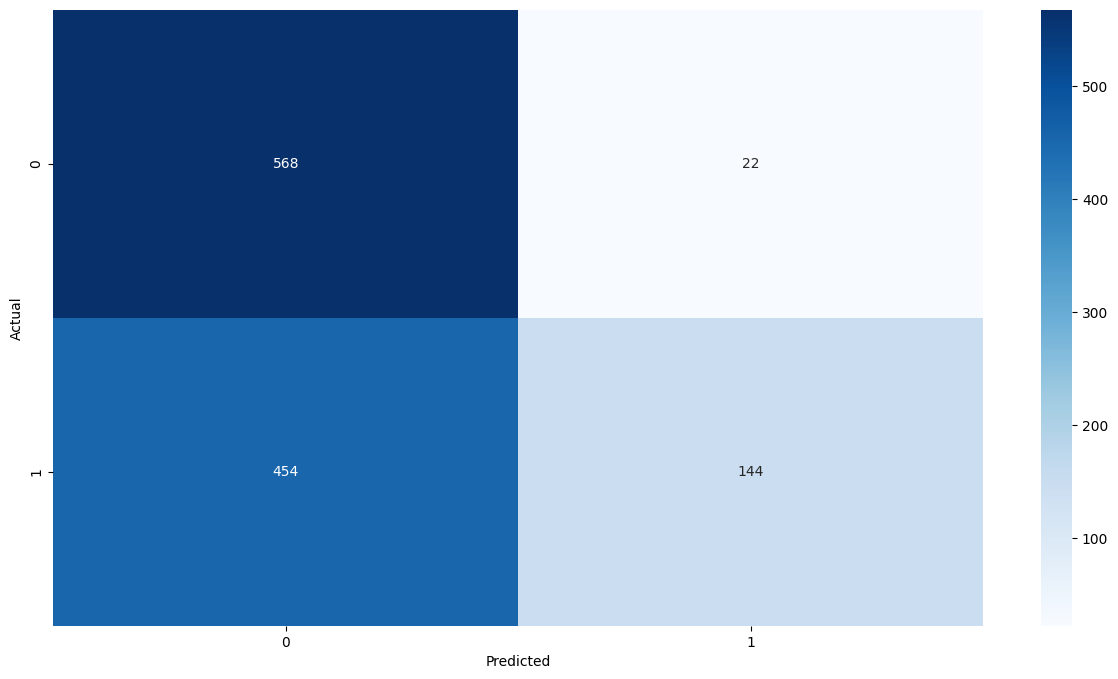

In [28]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test, svm_pred)

0.5993265993265994

In [87]:
svm = SVC(kernel = 'rbf', C = 50)

In [88]:
svm.fit(X_train,y_train)

SVC(C=50)

In [89]:
svm_pred_3 = svm.predict(X_test)

In [90]:
cm = confusion_matrix(y_test, svm_pred_1)
cm

array([[546,  44],
       [324, 274]])

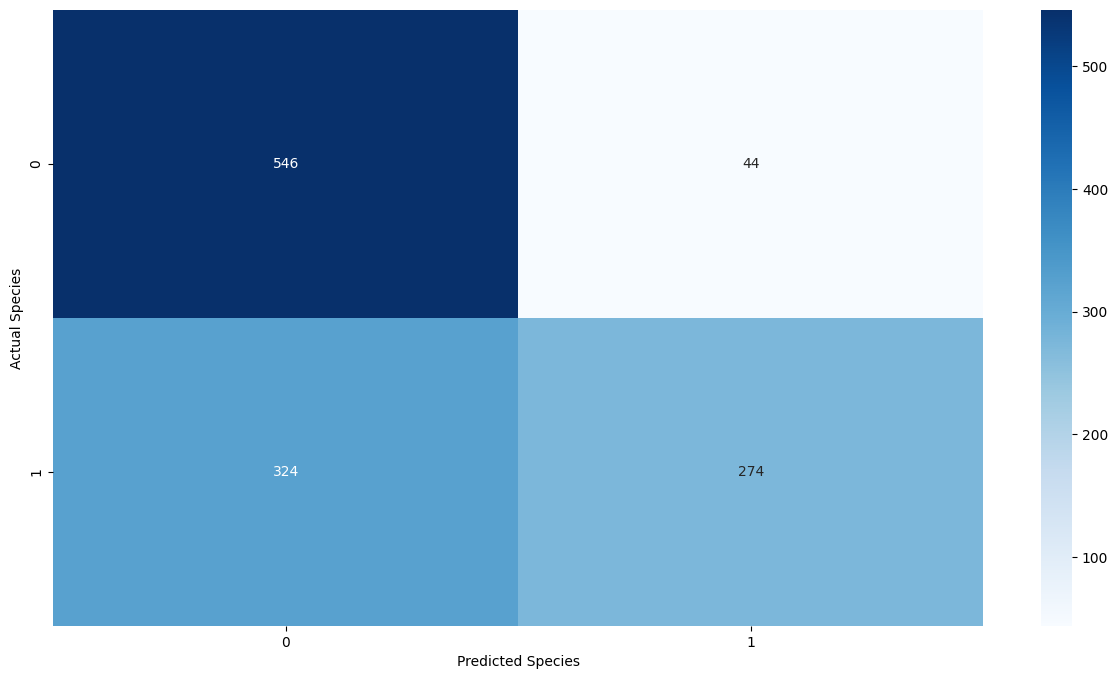

In [91]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [92]:
accuracy_score(y_test, svm_pred_3)

0.67003367003367

In [31]:
svm = SVC(kernel = 'rbf', C = 150)

In [86]:
svm.fit(X_train,y_train)

SVC(C=200)

In [33]:
svm_pred_1 = svm.predict(X_test)

In [34]:
cm = confusion_matrix(y_test, svm_pred_1)
cm

array([[546,  44],
       [324, 274]])

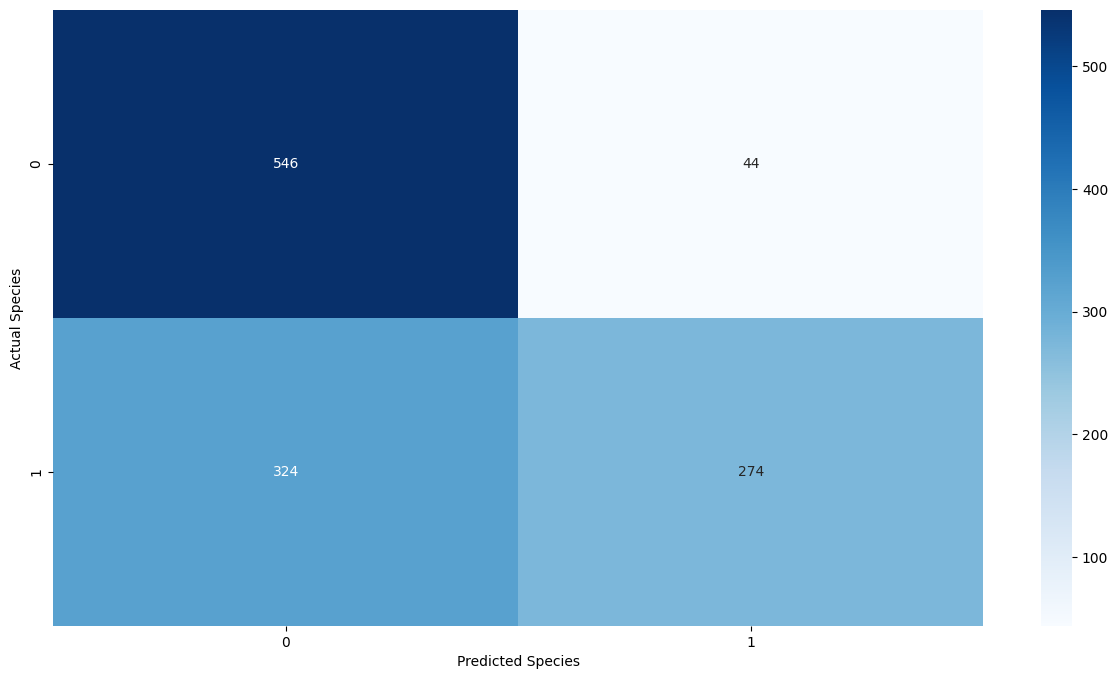

In [35]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [36]:
accuracy_score(y_test, svm_pred_1)

0.6902356902356902

In [105]:
svm = SVC(kernel = 'rbf', C = 400)

In [106]:
svm.fit(X_train,y_train)

SVC(C=400)

In [107]:
svm_pred_2 = svm.predict(X_test)

In [108]:
cm = confusion_matrix(y_test, svm_pred_2)
cm

array([[544,  46],
       [304, 294]])

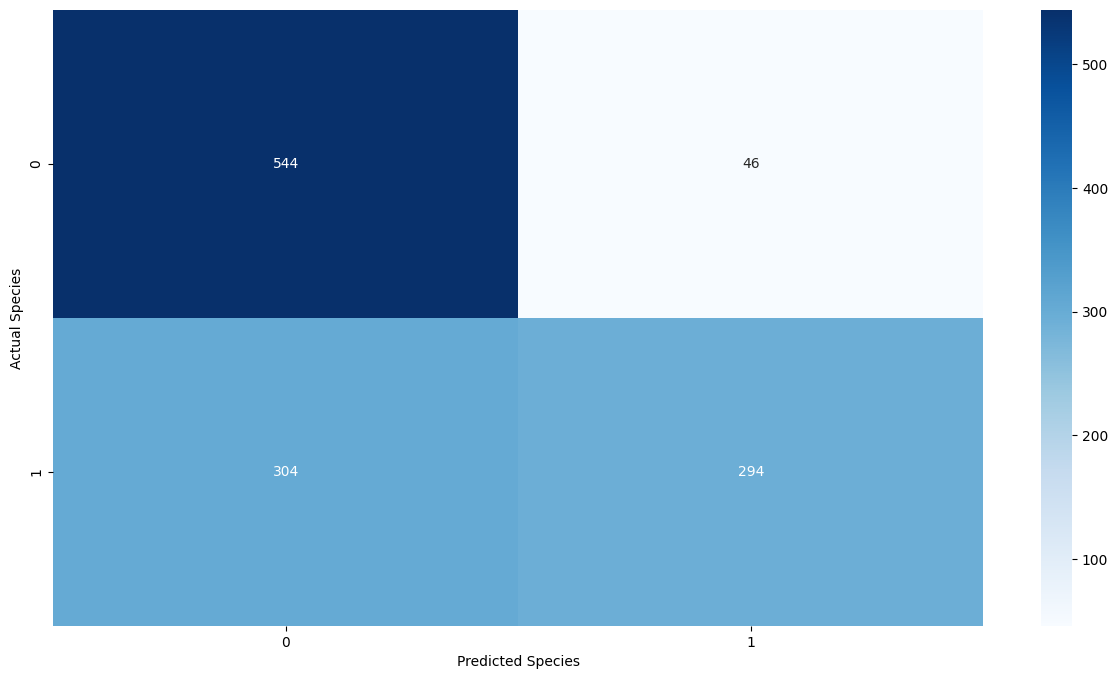

In [109]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [110]:
accuracy_score(y_test, svm_pred_2)

0.7053872053872053

In [43]:
#Polynomial Kernel

In [44]:
svm_poly = SVC(kernel = 'poly')

In [45]:
svm_poly.fit(X_train,y_train)

SVC(kernel='poly')

In [46]:
svm_poly_pred = svm.predict(X_test)

In [47]:
cm = confusion_matrix(y_test, svm_poly_pred)
cm

array([[546,  44],
       [317, 281]])

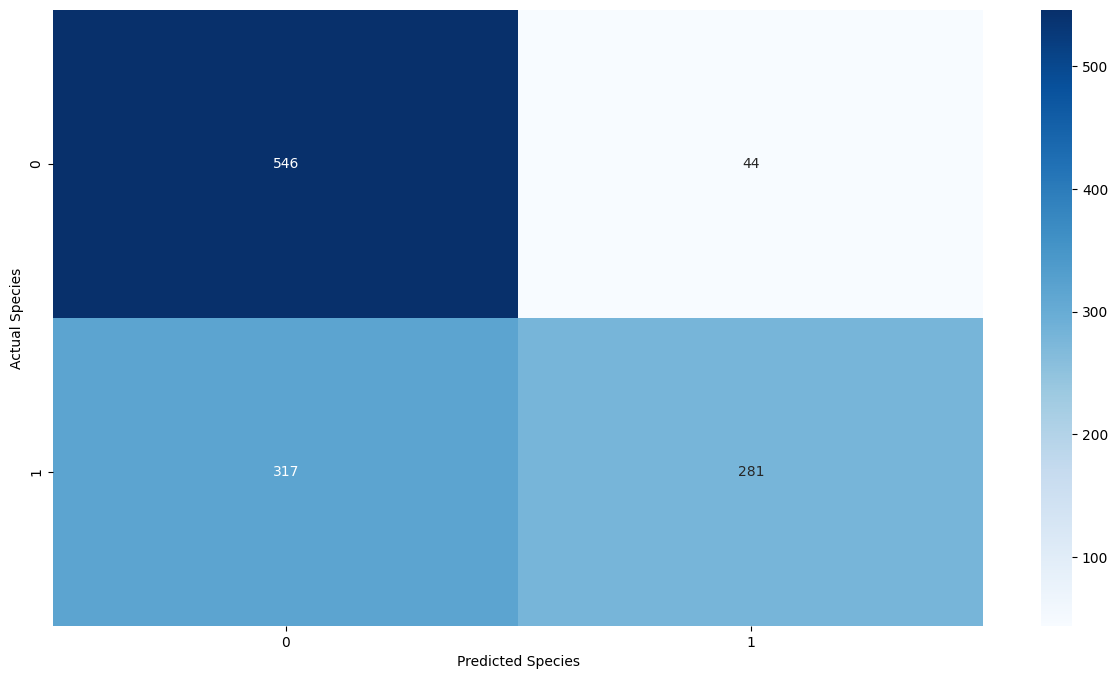

In [48]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [49]:
accuracy_score(y_test, svm_poly_pred)

0.6961279461279462

In [50]:
svm_poly = SVC(kernel = 'poly', C = 125)

In [51]:
svm_poly.fit(X_train,y_train)

SVC(C=125, kernel='poly')

In [52]:
svm_poly_pred_1 = svm_poly.predict(X_test)

In [53]:
cm = confusion_matrix(y_test, svm_poly_pred_1)
cm

array([[588,   2],
       [496, 102]])

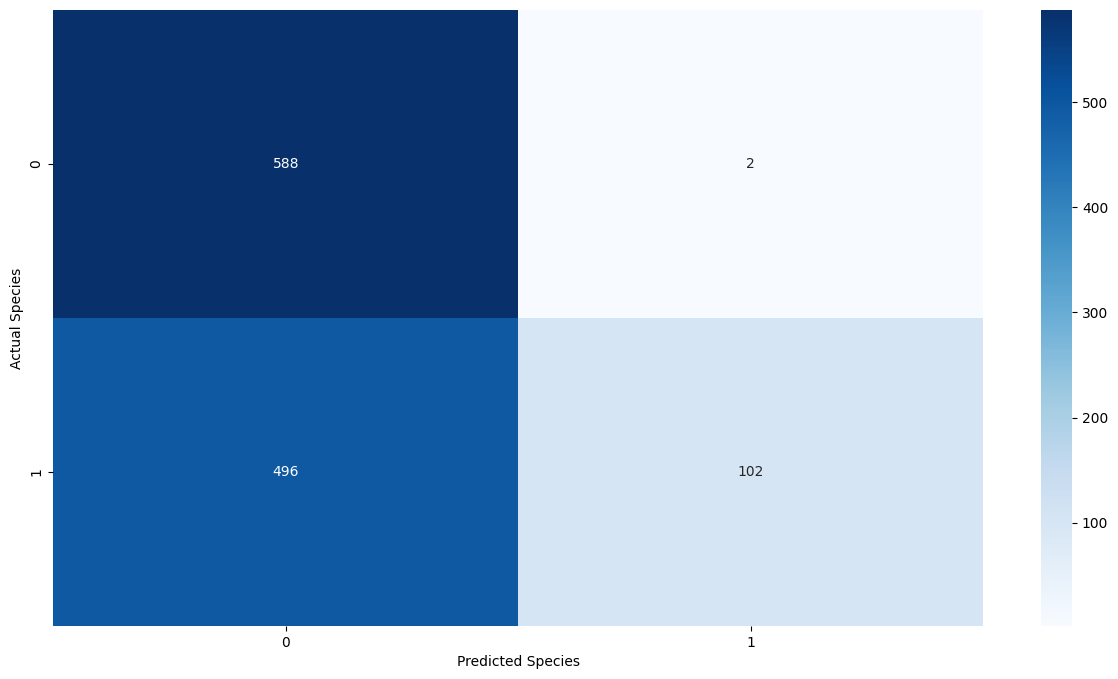

In [54]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [55]:
accuracy_score(y_test, svm_poly_pred_1)

0.5808080808080808

In [93]:
svm_poly = SVC(kernel = 'poly', C = 450)

In [94]:
svm_poly.fit(X_train,y_train)

SVC(C=450, kernel='poly')

In [95]:
svm_poly_pred_3 = svm_poly.predict(X_test)

In [96]:
cm = confusion_matrix(y_test, svm_poly_pred_2)
cm

array([[588,   2],
       [484, 114]])

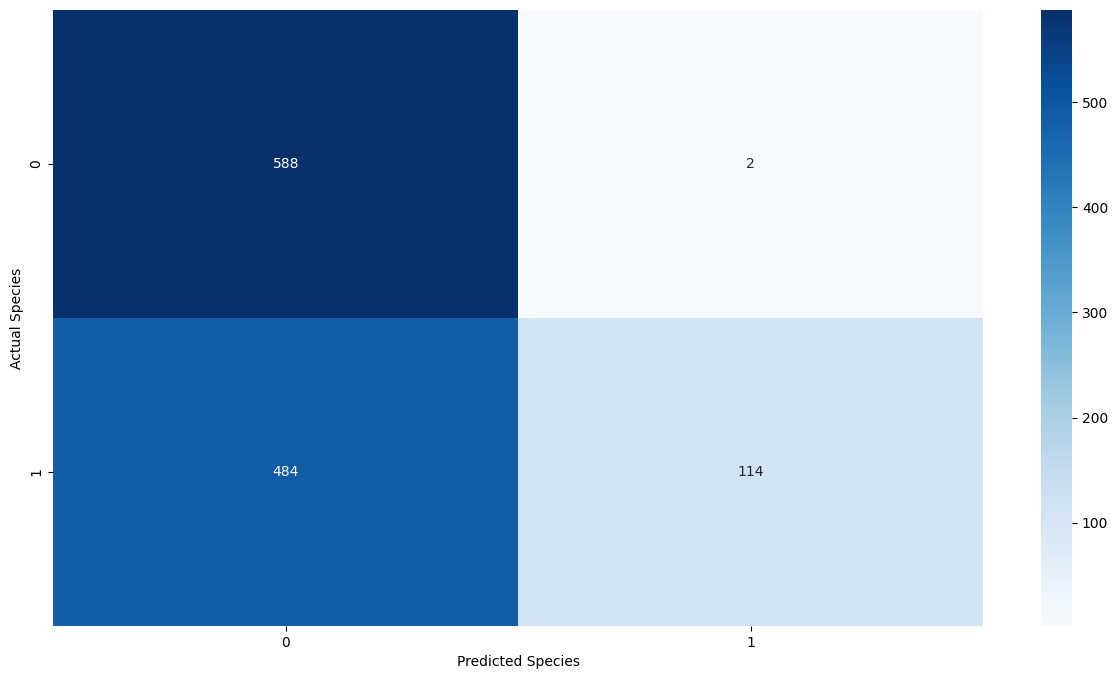

In [97]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [111]:
accuracy_score(y_test, svm_poly_pred_3)

0.5925925925925926

In [56]:
svm_poly = SVC(kernel = 'poly', C = 350)

In [57]:
svm_poly.fit(X_train,y_train)

SVC(C=350, kernel='poly')

In [58]:
svm_poly_pred_2 = svm_poly.predict(X_test)

In [59]:
cm = confusion_matrix(y_test, svm_poly_pred_2)

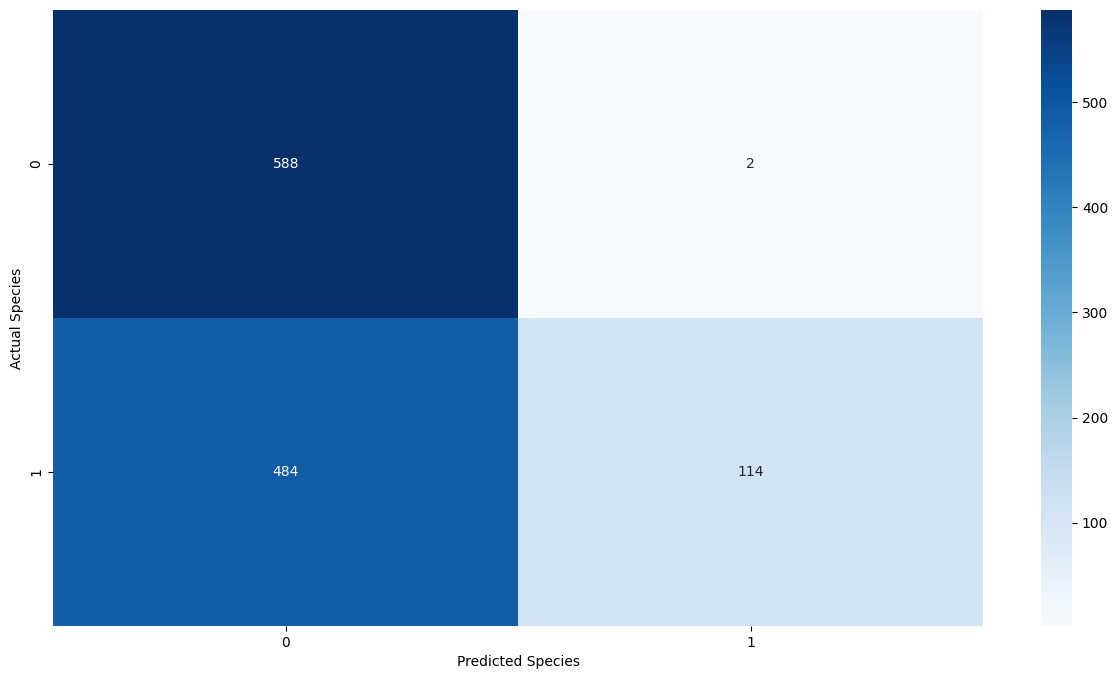

In [60]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [61]:
accuracy_score(y_test, svm_poly_pred_2)

0.5909090909090909

In [62]:
#Linear Kernel

In [63]:
svm_lin = SVC(kernel = "linear")

In [64]:
svm_lin.fit(X_train,y_train)

SVC(kernel='linear')

In [65]:
y_pred_lin = svm_lin.predict(X_test)

In [66]:
cm = confusion_matrix(y_test, y_pred_lin)

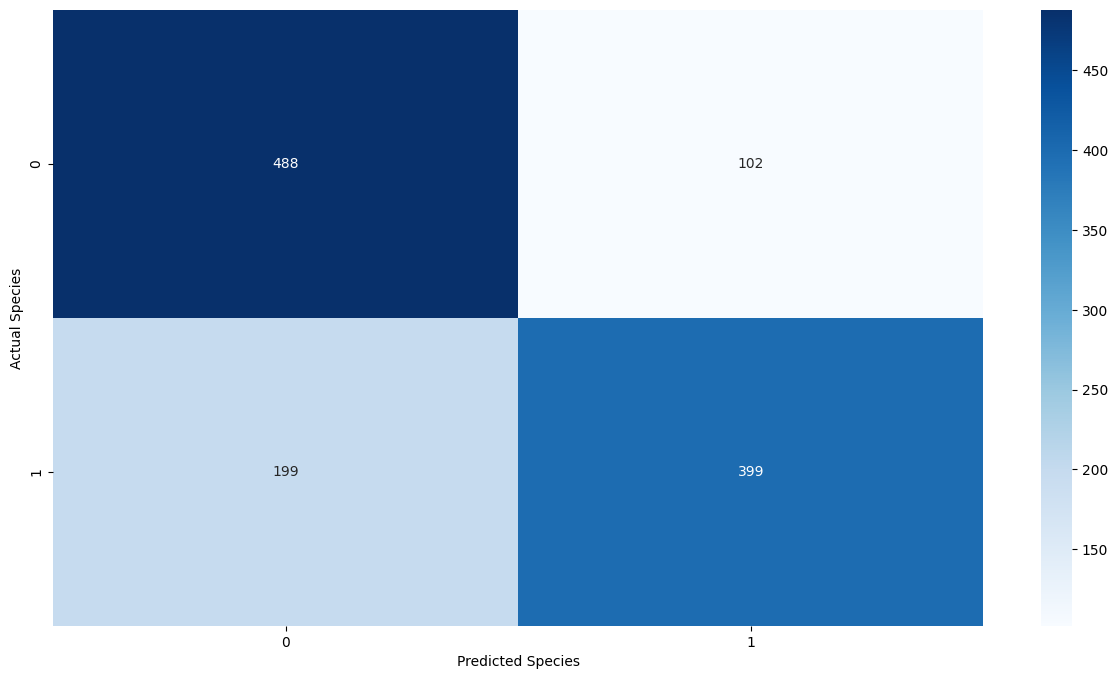

In [67]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [68]:
accuracy_score(y_test, y_pred_lin)

0.7466329966329966

In [69]:
svm_lin = SVC(kernel = "linear", C = 104)

In [70]:
svm_lin.fit(X_train,y_train)

SVC(C=10, kernel='linear')

In [71]:
y_pred_lin1 = svm_lin.predict(X_test)

In [72]:
cm = confusion_matrix(y_test, y_pred_lin1)
cm

array([[440, 150],
       [154, 444]])

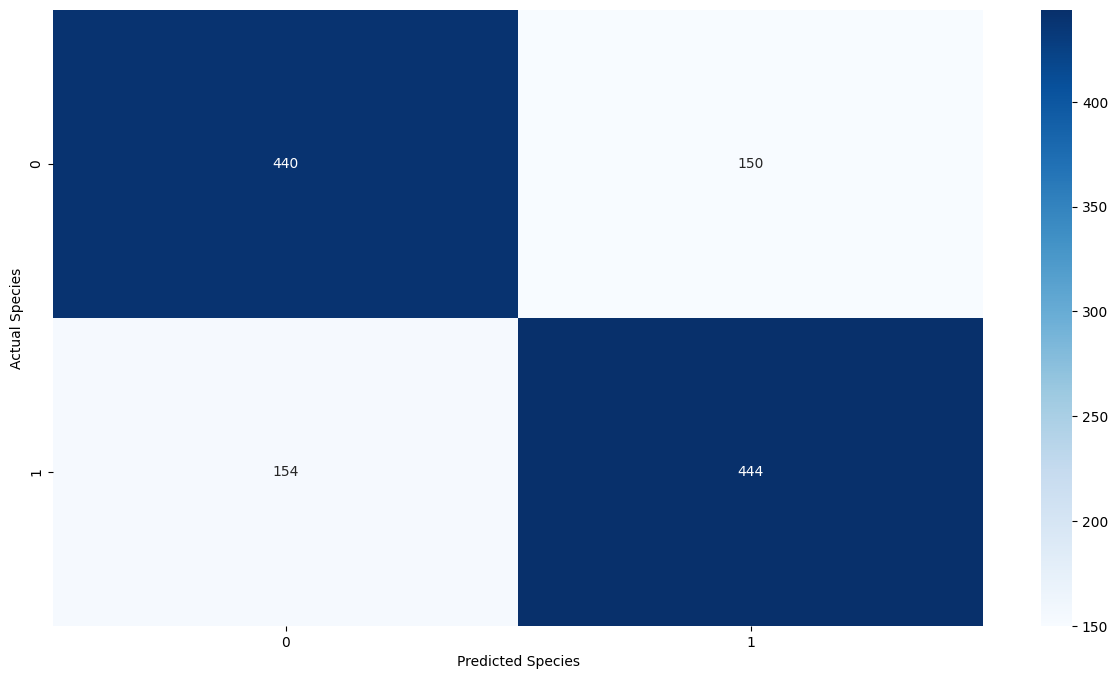

In [73]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [74]:
accuracy_score(y_test, y_pred_lin)

0.7466329966329966

In [99]:
svm_lin = SVC(kernel = "linear", C = 216)

In [100]:
svm_lin.fit(X_train,y_train)

SVC(C=216, kernel='linear')

In [101]:
y_pred_lin2 = svm_lin.predict(X_test)

In [102]:
cm = confusion_matrix(y_test, y_pred_lin2)
cm

array([[415, 175],
       [154, 444]])

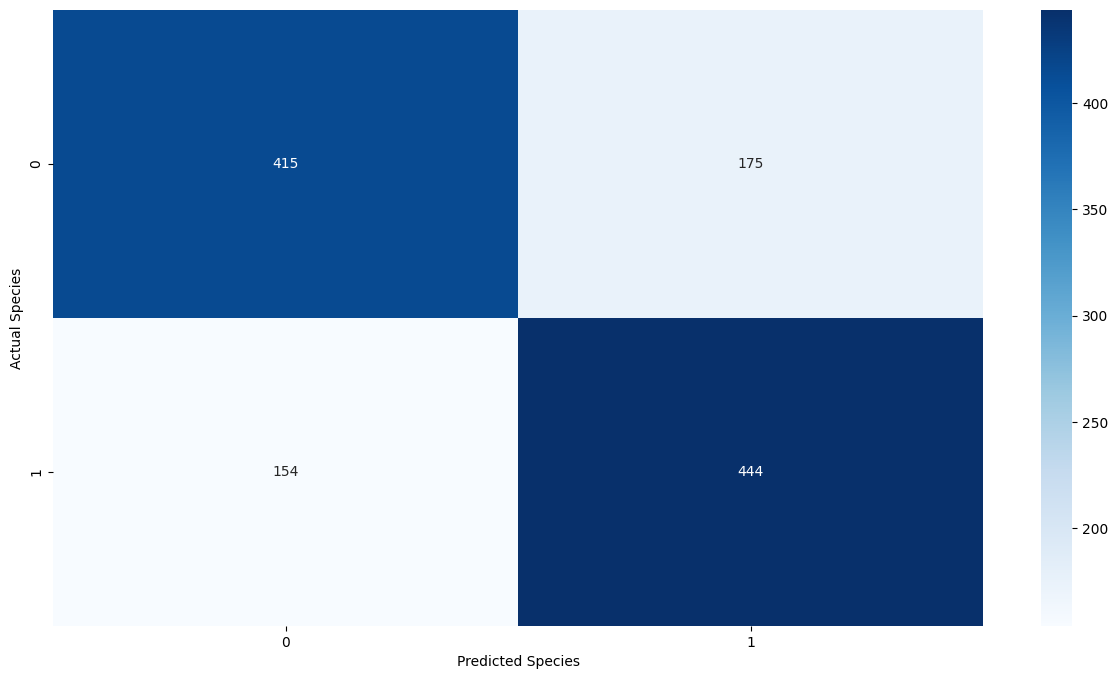

In [103]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [104]:
accuracy_score(y_test, y_pred_lin)

0.7466329966329966

In [112]:
svm_lin = SVC(kernel = "linear", C = 500)

In [113]:
svm_lin.fit(X_train,y_train)

SVC(C=500, kernel='linear')

In [114]:
y_pred_lin3 = svm_lin.predict(X_test)

In [115]:
cm = confusion_matrix(y_test, y_pred_lin2)
cm

array([[415, 175],
       [154, 444]])

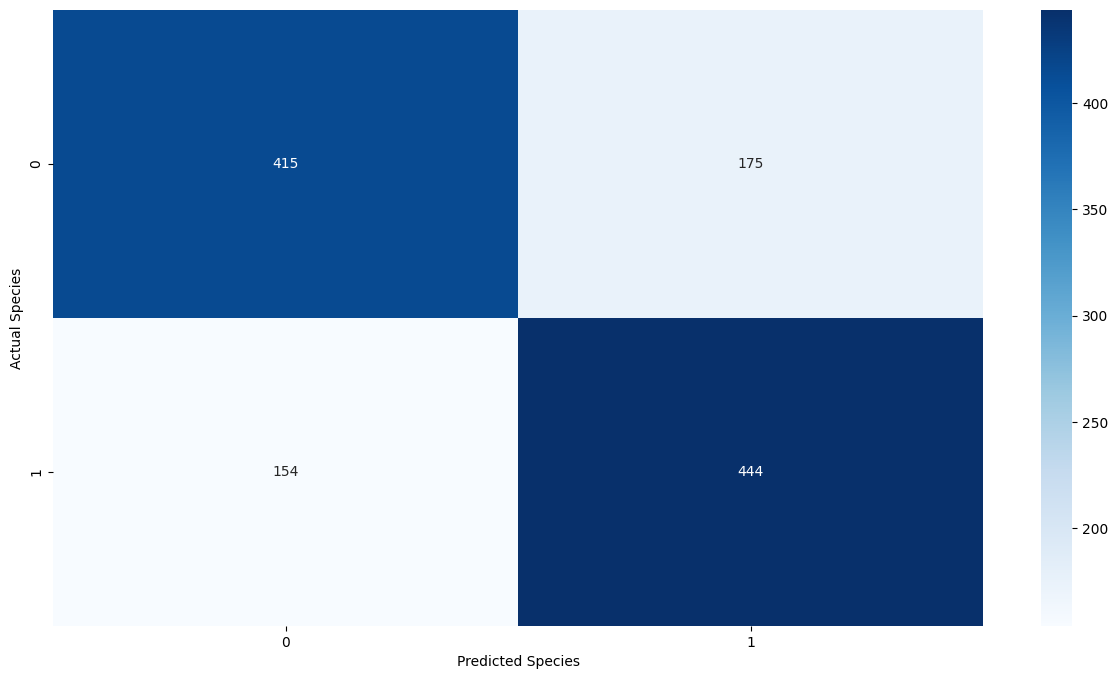

In [116]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [118]:
accuracy_score(y_test, y_pred_lin3)

0.7230639730639731

In [84]:
def plot_coefficients(MODEL=svm_lin, COLNAMES=train_df.columns, top_features=10):
    coef = MODEL.coef_.ravel()
    top_positive_coefficients = np.argsort(coef,axis=0)[-top_features:]
    top_negative_coefficients = np.argsort(coef,axis=0)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
    plt.bar(  x=  np.arange(2 * top_features)  , height=coef[top_coefficients], width=.5,  color=colors)
    feature_names = np.array(COLNAMES)
    plt.xticks(np.arange(0, (2*top_features)), feature_names[top_coefficients], rotation=60, ha="right")
    plt.show()
    

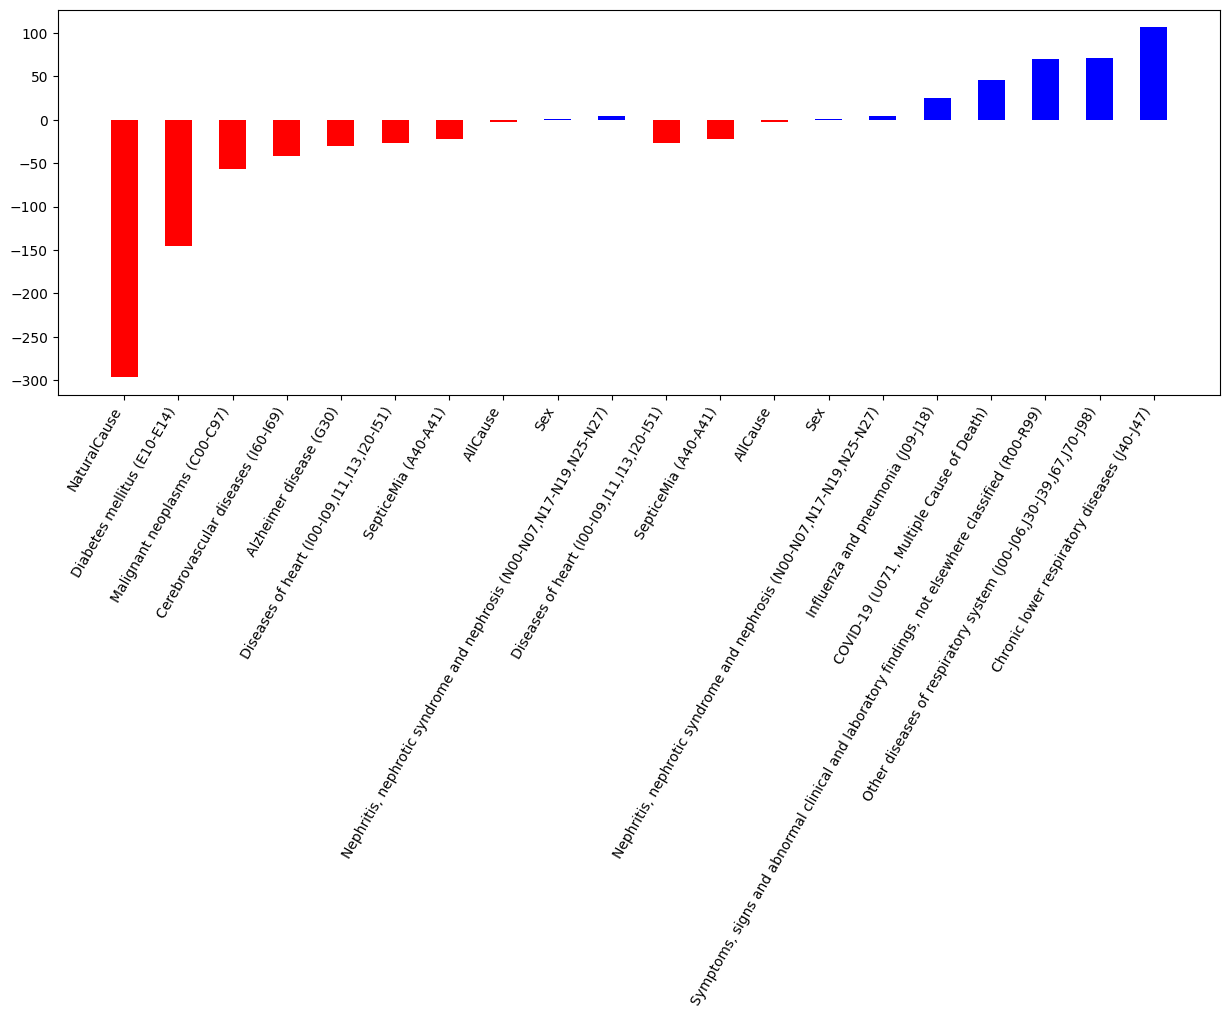

<Figure size 640x480 with 0 Axes>

In [85]:
plot_coefficients()
plt.savefig('KeyWords.pdf')